# Code for experimenting with impelementing periodicity

In [ ]:
import scipy.io
import numpy as np

initialdata = scipy.io.loadmat('test_case.mat')

Z_test_1 = initialdata['Z_test'][:,:,0]
Z_test_2 = initialdata['Z_test'][:,:,1]
Z_test_3 = initialdata['Z_test'][:,:,2]
amp = initialdata['amp'][0][0]
bx = initialdata['bx'][0]
f = initialdata['f'][0][0]
g = initialdata['g'][0][0]
M = initialdata['M']
Nsq = initialdata['Nsq'][0][0]
s = initialdata['s'][0][0]
th0 = initialdata['th0'][0][0]
w_test_1 = initialdata['w_test'][:,0]
w_test_2 = initialdata['w_test'][:,1]
w_test_3 = initialdata['w_test'][:,2]

In [ ]:
from pysdot.domain_types import ConvexPolyhedraAssembly
from pysdot import OptimalTransport
from pysdot import PowerDiagram
import numpy as np
import pyvista as pv
import weightguess as wg

nb_diracs = 2678

positions = Z_test_2
masses =  M[0]

domain = ConvexPolyhedraAssembly()
domain.add_box([bx[0], bx[1]], [bx[2], bx[3]])
box = bx
psi = np.zeros(shape = (nb_diracs,))

# we have to specify that dirac masses because by default, sdot takes ones * measure( domain ) / nb_diracs
# and that's not what we want in this case
w0 = w_test_2
ot = OptimalTransport( positions = positions, domain = domain, masses = masses, weights = w0 )

# first arg of add_replication is a translation
#for x in [ -1, 1 ]:
#    ot.pd.add_replication( [ x, 0 ] )

ot.adjust_weights()

filename = 'pb.vtk'
ot.pd.display_vtk( 'pb.vtk' )

In [ ]:
# Mass of cells
vols=ot.pd.integrals()
print(sum(vols))
print(vols)

# Read the data
grid=pv.read(filename)

# create cell data that gives the cell volumes, this allows us to colour by cell volumes
cell_vols = vols[grid.cell_data['num'].astype(int)]
grid.cell_data['vols']=cell_vols

# plot the data with an automatically created plotter, for a static picture use backend='static'
plotter = pv.Plotter(window_size=[800,800], notebook = True, off_screen=False)
plotter.add_mesh(grid)

# Render the frame
plotter.show()

In [ ]:
import matplotlib.pyplot as plt

#Plot the initial condition

fig = plt.figure()
fig.set_size_inches(10, 10, True)
ax = fig.add_subplot()
ax.scatter(Z_test_3[:,0], Z_test_3[:,1], color= 'red', s = 8)
ax.set_xlim([-1000000, 1000000])
ax.set_ylim([-3000000, 30000000])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

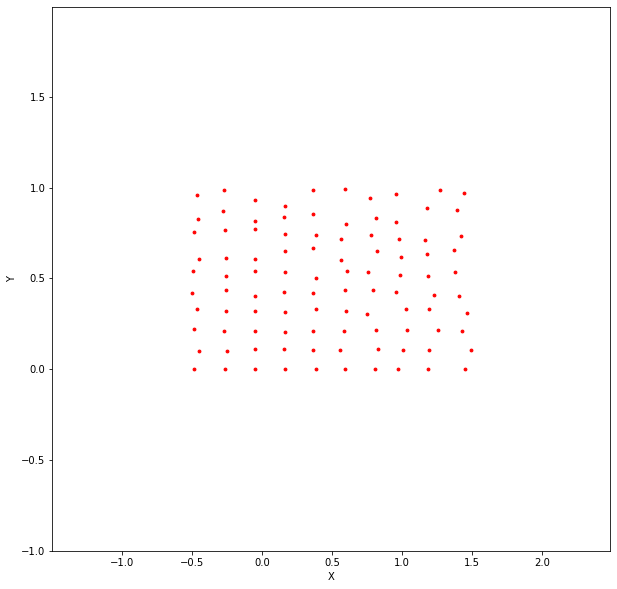

In [1]:
import initialconditions as ic
import matplotlib.pyplot as plt
import numpy as np
import main

N = 100 # Number of seeds
box = [-1, 0, 2, 1] # list or tuple defining domain [xmin, ymin, xmax, ymax]
per_tol = 1e-3 # Percent tolerance
periodic_x = True # Set the periodicity of X
periodic_y = False # Set the periodicity of Y
a = 1 # Set the replication parameter
tf = 0.1 # Final time
Ndt = 10 # Number of timesteps

#Initialize initial condition

Z = ic.create_artifical_initial(N, box[0] + 0.5, box[1], box[2] - 0.5, box[3], 'lattice', 0.9) 

#Plot the initial condition

fig = plt.figure()
fig.set_size_inches(10, 10, True)
ax = fig.add_subplot()
ax.scatter(Z[:,0], Z[:,1], color= 'red', s = 8)
ax.set_xlim([np.min(Z[:,0] - 1), np.max(Z[:,0] + 1)])
ax.set_ylim([np.min(Z[:,1] - 1), np.max(Z[:,1] + 1)])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

In [2]:
main.SG_solver(box, Z, N, per_tol, tf, Ndt, periodic_x, periodic_y, a, debug=True) #Solve and save the solution

#Can specify solver and debug mode.

Time Step 0
Target masses before Damped Newton [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]
Weights before Damped Newton [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00099177 -0.00096507
 -0.0010533  -0.00106403 -0.00101262 -0.00100119 -0.00104534 -0.00100109
 -0.00102781 -0.00104267 -0.00202238 -0.00194964 -0.00194314 -0.0018963
 -0.00195466 -0.00194238 -0.00197439 -0.00200619 -0.00198897 -0.00196256
 -0.00293712 -0.002859   -0.00286406 -0.00281205 -0.0029133